# DATA DRIVEN PROJECT: SPANISH ZERO ENERGY BUILDING 

Marco Lanzani, Giordano Zannini, Lorenzo Pilotti

The SML system is a house built at the Universidad CEU Cardenal Herrera (CEU-UCH) to participate in
the Solar Decathlon 2012 competition. Several technologies have been integrated to reduce power consumption.
A predictive module, based on artificial neural networks (ANNs), has been developed using
data acquired in Valencia. The module produces short-term forecast of indoor temperature, using as input
data captured by a complex monitoring system. The system expects to reduce the power consumption
related to Heating, Ventilation and Air Conditioning (HVAC) system, due to the following assumptions:
the high power consumption for which HVAC is responsible (53.9% of the overall consumption); and the
energy needed to maintain temperature is less than the energy required to lower/increase it. The prediction starts from a totally unknown environment applying online learning techniques. 
These forecasting measures could allow the house to adapt itself to future temperature conditions by using home automation in an energy-efficient manner.

To evaluate the on-line indoor temperature prediction system a
minimum of several weeks of sensing data are needed. Hence, the
prediction module could not be evaluated using SMLsystem data,
and it was trained using historical sensing data from SMLhouse
prototype. The SMLhouse monitoring database is larger (40 days
of data) and better to evaluate the feasibility of forecasting models
following an on-line algorithm.

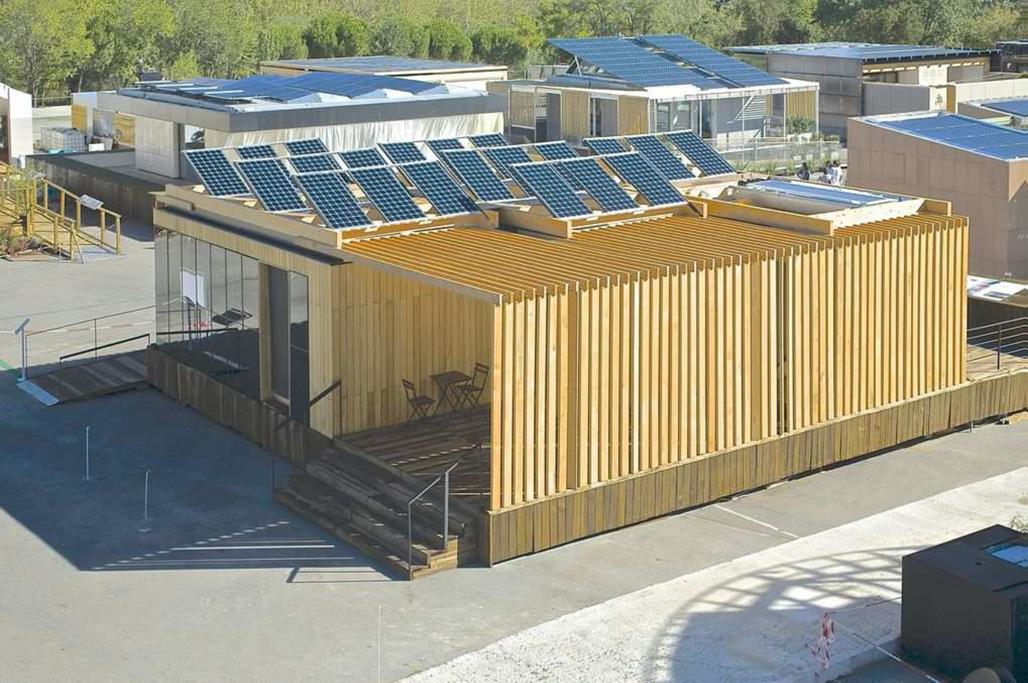

In [1]:
from IPython.display import Image
Image("SolarHouse.png")

The SMLsystem is a modular house built using mainly wood
and it was designed to be an energy self-sufficient house (nearzero
energy building), using passive strategies and water heating
systems to reduce the amount of electrical power needed to operate
the house.
The energy supply of the SMLsystem shown in Fig. 1 is divided
into solar power generation and Domestic Hot Water (DHW) system,
and it might be connected to the grid to use electrical power
when solar panels or batteries cannot supply enough power to the
house. The photovoltaic solar system is responsible for generating
electrical power by using 21 solar panels. These panels are installed
on the roof and at the east and west facades. The energy generated
by this system is managed by a device to inject energy into the
house, or in case there is an excess of power, to the competition
grid or a battery system. The batteries provide some autonomy to
the house during low sun irradiance hours. The thermal power generation
is achieved by using a solar panel that produces DHW which
is also used for electric energy saving. This water circulates from a
tank of 100 l to the panel when the control system detects that solar
radiation is high enough to heat the water. When radiation is low,
circulation stops to prevent water cooling

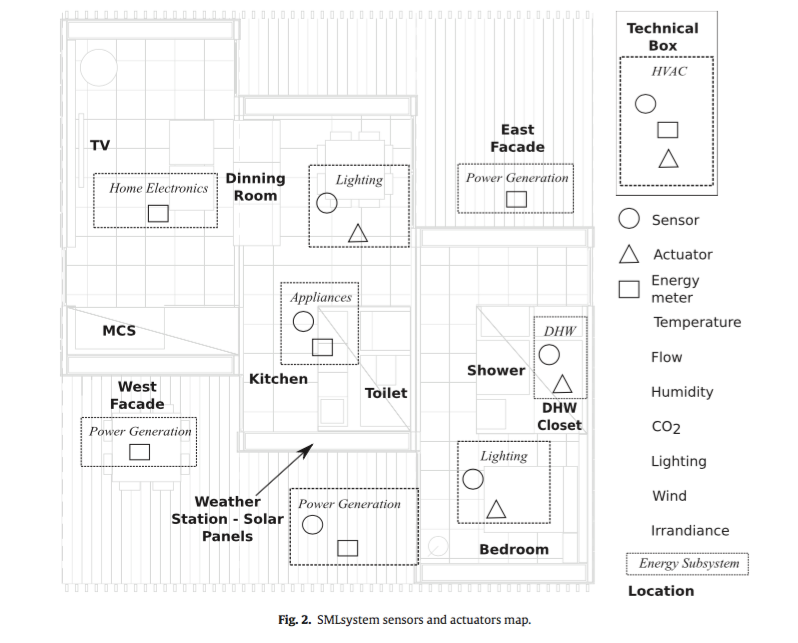

In [2]:
Image("immagine_casa.png")

The energy demand of the SMLsystem house is divided into
three main groups: HVAC, house appliances and lighting and home electronics (HE). The HVAC system consists in a heat pump which
is capable of heating or cooling water along with a rejector fan.
Water pipes are installed inside the house to circulate the conditioned
water and a fan coil system distributes the heat/cold using
ventilation.

The database used in this paper is a time series sampled with a
period of T = 15 min, where each sample is a mean of the last quarter,
reducing in this way the signal noise (for each hour it is computed
this mean at 0 min, 15 min, 30 min, and 45 min). The following three were found to be the most
important:

• Indoor temperature in ◦C. This is the interest forecasted variable.

• Hour feature in universal time coordinated (UTC), extracted from
the time-stamp of each pattern. The hour of the day is important to estimate the Sun position.

• Sun irradiance in W/m2. It is correlated with temperature because more irradiance will mean more heat.

To evaluate the forecasting models performance, two datasets
where used. The first, with 2764 instants (≈28 days), and the second
with 1373 instants (≈14 days). They were captured during 2011
March, and 2011 June respectively. In total, 4136 time instants are
available. The dataset is available for download at the UCI Machine
Learning repository

The attribute information of the dataset are:

1. Date: in UTC. 
2. Time: in UTC. 
3. Indoor temperature (dinning-room), in ÂºC. 
4. Indoor temperature (room), in ÂºC. 
5. Weather forecast temperature, in ÂºC. 
6. Carbon dioxide in ppm (dinning room). 
7. Carbon dioxide in ppm (room). 
8. Relative humidity (dinning room), in %. 
9. Relative humidity (room), in %. 
10. Lighting (dinning room), in Lux. 
11. Lighting (room), in Lux. 
12. Rain, the proportion of the last 15 minutes where rain was detected (a value in range [0,1]). 
13. Sun dusk. 
14. Wind, in m/s. 
15. Sun light in west facade, in Lux. 
16. Sun light in east facade, in Lux. 
17. Sun light in south facade, in Lux. 
18. Sun irradiance, in W/m2. 
19. Enthalpic motor 1, 0 or 1 (on-off). 
20. Enthalpic motor 2, 0 or 1 (on-off). 
21. Enthalpic motor turbo, 0 or 1 (on-off). 
22. Outdoor temperature, in ÂºC. 
23. Outdoor relative humidity, in %. 
24. Day of the week (computed from the date), 1=Monday, 7=Sunday. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16 ,10)

DataFolderPath="C:/Users/Lorenzo/Dropbox_Polimi_PC/Dropbox/Behzad Project" 
DataFileName="DataSet_1.txt"
DataSetFilePath=DataFolderPath+"/"+DataFileName

DF_DataSetSource=pd.read_csv(DataSetFilePath, sep=" ")
DF_DataSetSource.head()

,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
0,13/03/2012,11:45,18.1875,17.8275,0.0,216.560,221.920,39.9125,42.4150,81.6650,...,9690.24,12604.20,95436.8,758.880,0,0,0,18.1150,48.3750,2.0
1,13/03/2012,12:00,18.4633,18.1207,6.8,219.947,220.363,39.9267,42.2453,81.7413,...,11022.00,10787.20,95436.8,762.069,0,0,0,18.4147,47.8080,2.0
2,13/03/2012,12:15,18.7673,18.4367,17.0,219.403,218.933,39.7720,42.2267,81.4240,...,13960.50,9669.63,95398.6,766.251,0,0,0,18.8533,47.4320,2.0
3,13/03/2012,12:30,19.0727,18.7513,18.0,218.613,217.045,39.7760,42.0987,81.5013,...,18511.20,9648.13,95360.3,766.037,0,0,0,19.2907,47.0240,2.0
4,13/03/2012,12:45,19.3721,19.0414,20.0,217.714,216.080,39.7757,42.0686,81.4657,...,26349.00,9208.32,95354.9,762.743,0,0,0,19.7400,45.4743,2.0


I upload the dataset from the file "DataSet_1.txt" and plot the dataset without corrections

In [4]:
time=DF_DataSetSource["2:Time"]
date=DF_DataSetSource["1:Date"]
New_column=date+" "+time
DF_joined=DF_DataSetSource.join([New_column])
DF_DataSetSourceModified=DF_joined
DF_DataSetSourceModified.index=DF_joined[0]
DF_DataSetSourceModified.index.names=["DateTime"]
DF_DataSetSourceModified.head()

,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,...,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week,0
DateTime,,,,,,,,,,,,,,,,,,,,,
13/03/2012 11:45,13/03/2012,11:45,18.1875,17.8275,0.0,216.560,221.920,39.9125,42.4150,81.6650,...,12604.20,95436.8,758.880,0,0,0,18.1150,48.3750,2.0,13/03/2012 11:45
13/03/2012 12:00,13/03/2012,12:00,18.4633,18.1207,6.8,219.947,220.363,39.9267,42.2453,81.7413,...,10787.20,95436.8,762.069,0,0,0,18.4147,47.8080,2.0,13/03/2012 12:00
13/03/2012 12:15,13/03/2012,12:15,18.7673,18.4367,17.0,219.403,218.933,39.7720,42.2267,81.4240,...,9669.63,95398.6,766.251,0,0,0,18.8533,47.4320,2.0,13/03/2012 12:15
13/03/2012 12:30,13/03/2012,12:30,19.0727,18.7513,18.0,218.613,217.045,39.7760,42.0987,81.5013,...,9648.13,95360.3,766.037,0,0,0,19.2907,47.0240,2.0,13/03/2012 12:30
13/03/2012 12:45,13/03/2012,12:45,19.3721,19.0414,20.0,217.714,216.080,39.7757,42.0686,81.4657,...,9208.32,95354.9,762.743,0,0,0,19.7400,45.4743,2.0,13/03/2012 12:45


I add a new column (DateTime) that will be the column of index of the whole dataframe

In [5]:
ParseIndex=pd.to_datetime(DF_DataSetSourceModified.index, dayfirst=True)
DF_DataSetSourceModified.index=ParseIndex

ChosenDate=DF_DataSetSourceModified["2012-03-17 00:45:00":"2012-03-19 00:45:00"]
ChosenDate.head()
ChosenDate.describe()

,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,11:Lighting_Habitacion_Sensor,12:Precipitacion,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
count,193.000000,193.000000,193.0,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.0,...,193.000000,193.000000,193.000000,193.000000,193.0,193.0,193.0,193.000000,193.000000,193.000000
mean,20.391074,19.962334,15.0,203.594705,205.944368,40.227156,41.954546,29.564578,44.504292,0.0,...,17733.627907,14173.778819,28901.090031,231.956644,0.0,0.0,0.0,18.256545,45.962084,6.417962
std,2.650850,2.612536,0.0,3.020098,3.088221,5.945708,5.983904,26.450798,46.831226,0.0,...,29493.858419,24410.805392,38283.869002,303.413874,0.0,0.0,0.0,4.254842,13.244974,0.843631
min,15.294700,14.833300,15.0,197.888000,200.512000,27.084000,29.594700,11.165300,11.880000,0.0,...,0.000000,0.000000,0.000000,-4.034670,0.0,0.0,0.0,10.983300,22.728000,1.000000
25%,18.376700,18.012700,15.0,202.016000,204.181000,37.529300,38.702700,11.524000,13.184000,0.0,...,0.000000,0.000000,0.000000,-3.512000,0.0,0.0,0.0,14.867300,35.478700,6.000000
50%,20.894700,20.485300,15.0,203.008000,205.408000,41.960000,43.344000,11.801300,14.289300,0.0,...,0.000000,0.000000,0.000000,-0.949333,0.0,0.0,0.0,18.036700,47.469300,6.066670
75%,22.725300,22.272000,15.0,205.707000,207.648000,45.000000,45.957300,41.516000,72.306700,0.0,...,15243.300000,9791.490000,68089.200000,521.323000,0.0,0.0,0.0,22.026700,55.952000,7.000000
max,24.192000,23.512000,15.0,211.893000,214.976000,47.280000,49.848000,110.693000,143.120000,0.0,...,94213.500000,79178.400000,95627.900000,810.496000,0.0,0.0,0.0,25.713300,66.736000,7.000000


I changed the index type as "datatime" and choosed a limited period of time.

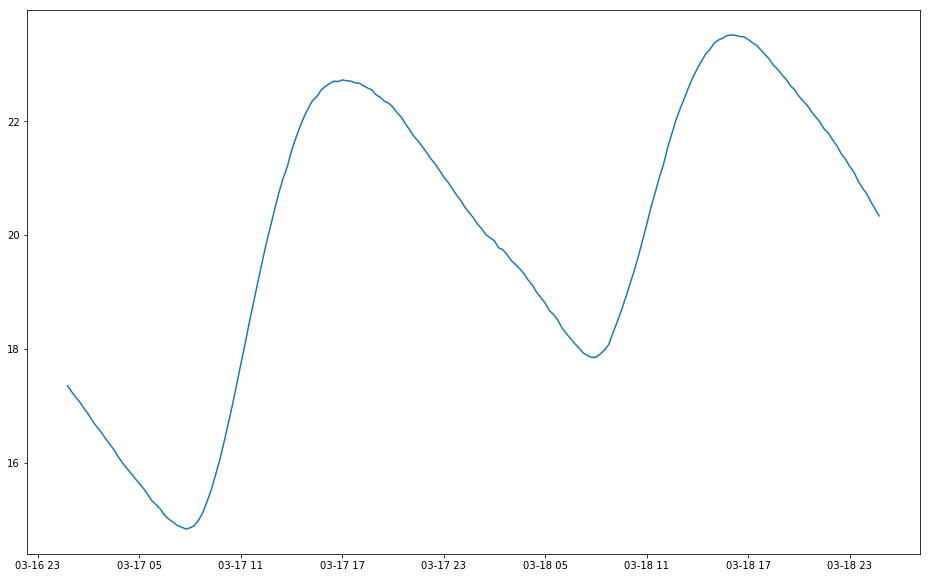

In [6]:
plt.plot(ChosenDate["4:Temperature_Habitacion_Sensor"])
plt.show()

Here is the plot to point out the behaviour of our target (indoor temperature of the room), during the select period of time. 

In [7]:
DF_DataSetSourceModified.corr()["4:Temperature_Habitacion_Sensor"]

3:Temperature_Comedor_Sensor       0.990941
4:Temperature_Habitacion_Sensor    1.000000
5:Weather_Temperature              0.720877
6:CO2_Comedor_Sensor               0.061361
7:CO2_Habitacion_Sensor            0.056195
8:Humedad_Comedor_Sensor          -0.275193
9:Humedad_Habitacion_Sensor       -0.417901
10:Lighting_Comedor_Sensor         0.069264
11:Lighting_Habitacion_Sensor      0.002253
12:Precipitacion                  -0.262621
13:Meteo_Exterior_Crepusculo       0.068897
14:Meteo_Exterior_Viento           0.220667
15:Meteo_Exterior_Sol_Oest         0.335288
16:Meteo_Exterior_Sol_Est         -0.269034
17:Meteo_Exterior_Sol_Sud          0.000072
18:Meteo_Exterior_Piranometro      0.123390
19:Exterior_Entalpic_1                  NaN
20:Exterior_Entalpic_2                  NaN
21:Exterior_Entalpic_turbo              NaN
22:Temperature_Exterior_Sensor     0.863417
23:Humedad_Exterior_Sensor        -0.549681
24:Day_Of_Week                     0.016517
Name: 4:Temperature_Habitacion_S

With this command is possible to see the correlation between our target and all other columns of the data. Good values of correlation are found for the outdoor temperature ("22:Temperature_Exterior_Sensor") and for irradiance ("18:Meteo_Exterior_Piranometro"). So I'll investigate first this values as parameters for predicting the room temperaure.

In [8]:
booleanVector=(DF_DataSetSourceModified["18:Meteo_Exterior_Piranometro"]<0)
DF_DataSetSourceModified["18:Meteo_Exterior_Piranometro"][booleanVector]=0

C:\Users\Lorenzo\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


I'm cleaning the data frame to delete any negative value of irradiance

In [9]:
DF_DataSetSourceModified["15:Meteo_Exterior_Sol_Oest"]=DF_DataSetSourceModified["15:Meteo_Exterior_Sol_Oest"]/685
DF_DataSetSourceModified["16:Meteo_Exterior_Sol_Est"]=DF_DataSetSourceModified["16:Meteo_Exterior_Sol_Est"]/685
DF_DataSetSourceModified["17:Meteo_Exterior_Sol_Sud"]=DF_DataSetSourceModified["17:Meteo_Exterior_Sol_Sud"]/685
DF_DataSetSourceModified.head()

,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,...,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week,0
DateTime,,,,,,,,,,,,,,,,,,,,,
2012-03-13 11:45:00,13/03/2012,11:45,18.1875,17.8275,0.0,216.560,221.920,39.9125,42.4150,81.6650,...,18.400292,139.323796,758.880,0,0,0,18.1150,48.3750,2.0,13/03/2012 11:45
2012-03-13 12:00:00,13/03/2012,12:00,18.4633,18.1207,6.8,219.947,220.363,39.9267,42.2453,81.7413,...,15.747737,139.323796,762.069,0,0,0,18.4147,47.8080,2.0,13/03/2012 12:00
2012-03-13 12:15:00,13/03/2012,12:15,18.7673,18.4367,17.0,219.403,218.933,39.7720,42.2267,81.4240,...,14.116248,139.268029,766.251,0,0,0,18.8533,47.4320,2.0,13/03/2012 12:15
2012-03-13 12:30:00,13/03/2012,12:30,19.0727,18.7513,18.0,218.613,217.045,39.7760,42.0987,81.5013,...,14.084861,139.212117,766.037,0,0,0,19.2907,47.0240,2.0,13/03/2012 12:30
2012-03-13 12:45:00,13/03/2012,12:45,19.3721,19.0414,20.0,217.714,216.080,39.7757,42.0686,81.4657,...,13.442803,139.204234,762.743,0,0,0,19.7400,45.4743,2.0,13/03/2012 12:45


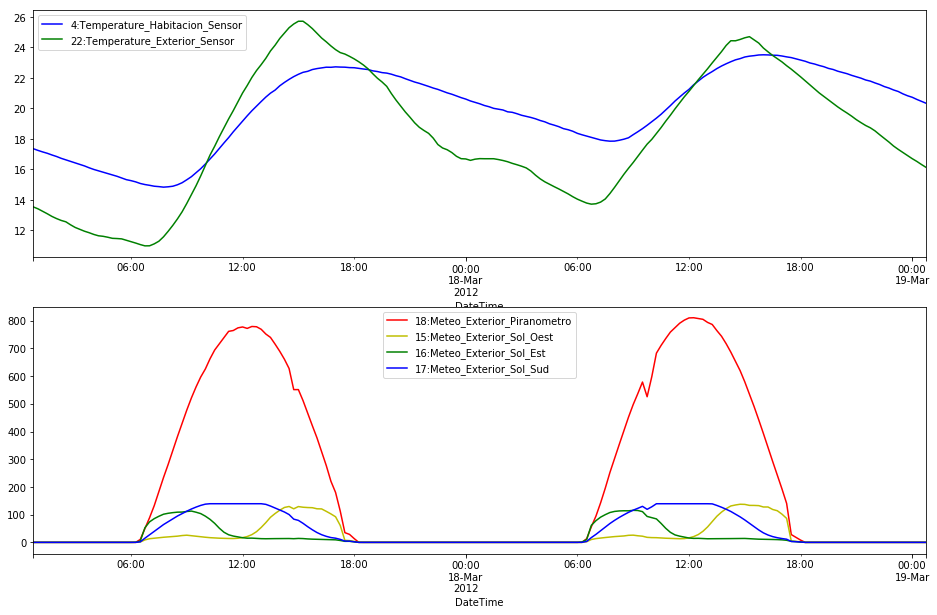

In [10]:
ChosenDate=DF_DataSetSourceModified["2012-03-17 00:45:00":"2012-03-19 00:45:00"]
fig=plt.figure()
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(211)
ax3=fig.add_subplot(212)
ax4=fig.add_subplot(212)
ax5=fig.add_subplot(212)
ax6=fig.add_subplot(212)

ChosenDate["4:Temperature_Habitacion_Sensor"].plot(ax=ax1, color="b", legend=True)
ChosenDate["22:Temperature_Exterior_Sensor"].plot(ax=ax2, color="g", legend=True)
ChosenDate["18:Meteo_Exterior_Piranometro"].plot(ax=ax3, color="r", legend=True)
ChosenDate["15:Meteo_Exterior_Sol_Oest"].plot(ax=ax4, color="y", legend=True)
ChosenDate["16:Meteo_Exterior_Sol_Est"].plot(ax=ax5, color="g", legend=True)
ChosenDate["17:Meteo_Exterior_Sol_Sud"].plot(ax=ax6, color="b", legend=True)
plt.show()



Is remarkable that there is some delay between the peak values of the two graphs. Thus there would be a correlation between indoor temperature and lagged values of irradiance. The same as for the outdoor temperature, but with a smaller gap.  

# FINAL DATASET

In [11]:
DF_FinalDataSet=pd.DataFrame([], index=DF_DataSetSourceModified.index)
DF_FinalDataSet["indoor temperature"]=DF_DataSetSourceModified["4:Temperature_Habitacion_Sensor"]
DF_FinalDataSet["outdoor temperature"]=DF_DataSetSourceModified["22:Temperature_Exterior_Sensor"]
DF_FinalDataSet["outdoor pyranometer"]=DF_DataSetSourceModified["18:Meteo_Exterior_Piranometro"]
DF_FinalDataSet.head()

,indoor temperature,outdoor temperature,outdoor pyranometer
DateTime,,,
2012-03-13 11:45:00,17.8275,18.1150,758.880
2012-03-13 12:00:00,18.1207,18.4147,762.069
2012-03-13 12:15:00,18.4367,18.8533,766.251
2012-03-13 12:30:00,18.7513,19.2907,766.037
2012-03-13 12:45:00,19.0414,19.7400,762.743


I've created a new dataframe containing only the columns significant for my predicition model.

In [12]:
def lag_column(df, column_name, lag_period=1, initial_time=1):
    """this function is useful to add one or more columns of lagged values to an existing dataframe.
    It recieves in input the dataframe, the dataframe column that has to be lagged, the lag period
    and the starting lag period. It returns the origianl dataframe plus lagged columns """
    
    for i in range(initial_time, lag_period+1, 1):
        new_column=column_name+" -"+str(i*15)+"min"
        df[new_column]=df[column_name].shift(i)
    return df

This funcion creates a new column in the dataframe with lagged parameters. I can choose the initial time of lagging and how many time shifts I want to apply.

In [13]:
DF_FinalDataSet=lag_column(DF_FinalDataSet, "outdoor temperature", lag_period=9, initial_time=4)
DF_FinalDataSet=lag_column(DF_FinalDataSet, "outdoor pyranometer", lag_period=22, initial_time=16)
DF_FinalDataSet=lag_column(DF_FinalDataSet, "indoor temperature", lag_period=8, initial_time=4)
DF_FinalDataSet.dropna(inplace=True)
DF_FinalDataSet.head()

,indoor temperature,outdoor temperature,outdoor pyranometer,outdoor temperature -60min,outdoor temperature -75min,outdoor temperature -90min,outdoor temperature -105min,outdoor temperature -120min,outdoor temperature -135min,outdoor pyranometer -240min,...,outdoor pyranometer -270min,outdoor pyranometer -285min,outdoor pyranometer -300min,outdoor pyranometer -315min,outdoor pyranometer -330min,indoor temperature -60min,indoor temperature -75min,indoor temperature -90min,indoor temperature -105min,indoor temperature -120min
DateTime,,,,,,,,,,,,,,,,,,,,,
2012-03-13 17:15:00,23.8520,20.2047,101.24400,21.1773,21.4667,21.7067,21.9373,22.0800,22.1373,740.949,...,762.743,766.037,766.251,762.069,758.880,22.9373,22.7307,22.4040,22.1573,21.8467
2012-03-13 17:30:00,24.0213,19.9760,24.66530,20.9373,21.1773,21.4667,21.7067,21.9373,22.0800,721.109,...,752.683,762.743,766.037,766.251,762.069,23.2000,22.9373,22.7307,22.4040,22.1573
2012-03-13 17:45:00,24.1413,19.7560,15.57000,20.7107,20.9373,21.1773,21.4667,21.7067,21.9373,699.392,...,740.949,752.683,762.743,766.037,766.251,23.4360,23.2000,22.9373,22.7307,22.4040
2012-03-13 18:00:00,24.2680,19.5273,5.00933,20.4627,20.7107,20.9373,21.1773,21.4667,21.7067,677.675,...,721.109,740.949,752.683,762.743,766.037,23.6680,23.4360,23.2000,22.9373,22.7307
2012-03-13 18:15:00,24.3800,19.3013,0.00000,20.2047,20.4627,20.7107,20.9373,21.1773,21.4667,648.427,...,699.392,721.109,740.949,752.683,762.743,23.8520,23.6680,23.4360,23.2000,22.9373


The outdoor irradiance is shifted from -16*15 min. It takes time to see the dependency of solar irradiation on the indoor temperature

In [14]:
DF_FinalDataSet.corr()["indoor temperature"]

indoor temperature             1.000000
outdoor temperature            0.863806
outdoor pyranometer            0.121832
outdoor temperature -60min     0.911065
outdoor temperature -75min     0.916008
outdoor temperature -90min     0.918176
outdoor temperature -105min    0.917607
outdoor temperature -120min    0.914369
outdoor temperature -135min    0.908528
outdoor pyranometer -240min    0.576342
outdoor pyranometer -255min    0.582502
outdoor pyranometer -270min    0.586072
outdoor pyranometer -285min    0.587128
outdoor pyranometer -300min    0.585833
outdoor pyranometer -315min    0.582323
outdoor pyranometer -330min    0.576681
indoor temperature -60min      0.980952
indoor temperature -75min      0.970644
indoor temperature -90min      0.958285
indoor temperature -105min     0.943971
indoor temperature -120min     0.927814
Name: indoor temperature, dtype: float64

From the table above I can see that the correlation with the one hour lagged outdoor temperature is around 0.9, and 0.58 with five hour lagged irradiance.
The correlation with the indoor temperature itself is reasonably high and can be choose as well as input parameter for the regression model.

# REGRESSION

In [15]:
DF_target = DF_FinalDataSet["indoor temperature"]
DF_features = DF_FinalDataSet.drop(["indoor temperature"],axis=1)
DF_features = DF_features.drop(["outdoor temperature"],axis=1)
DF_features = DF_features.drop(["outdoor pyranometer"],axis=1)
DF_features.head()

,outdoor temperature -60min,outdoor temperature -75min,outdoor temperature -90min,outdoor temperature -105min,outdoor temperature -120min,outdoor temperature -135min,outdoor pyranometer -240min,outdoor pyranometer -255min,outdoor pyranometer -270min,outdoor pyranometer -285min,outdoor pyranometer -300min,outdoor pyranometer -315min,outdoor pyranometer -330min,indoor temperature -60min,indoor temperature -75min,indoor temperature -90min,indoor temperature -105min,indoor temperature -120min
DateTime,,,,,,,,,,,,,,,,,,
2012-03-13 17:15:00,21.1773,21.4667,21.7067,21.9373,22.0800,22.1373,740.949,752.683,762.743,766.037,766.251,762.069,758.880,22.9373,22.7307,22.4040,22.1573,21.8467
2012-03-13 17:30:00,20.9373,21.1773,21.4667,21.7067,21.9373,22.0800,721.109,740.949,752.683,762.743,766.037,766.251,762.069,23.2000,22.9373,22.7307,22.4040,22.1573
2012-03-13 17:45:00,20.7107,20.9373,21.1773,21.4667,21.7067,21.9373,699.392,721.109,740.949,752.683,762.743,766.037,766.251,23.4360,23.2000,22.9373,22.7307,22.4040
2012-03-13 18:00:00,20.4627,20.7107,20.9373,21.1773,21.4667,21.7067,677.675,699.392,721.109,740.949,752.683,762.743,766.037,23.6680,23.4360,23.2000,22.9373,22.7307
2012-03-13 18:15:00,20.2047,20.4627,20.7107,20.9373,21.1773,21.4667,648.427,677.675,699.392,721.109,740.949,752.683,762.743,23.8520,23.6680,23.4360,23.2000,22.9373


Now I can going on with the linear regression. First the target of the linear regression must be selected. After I create a dataframe with the features, dropping the unrelevant columns from the original one and maintaining only columns with lagged values. 

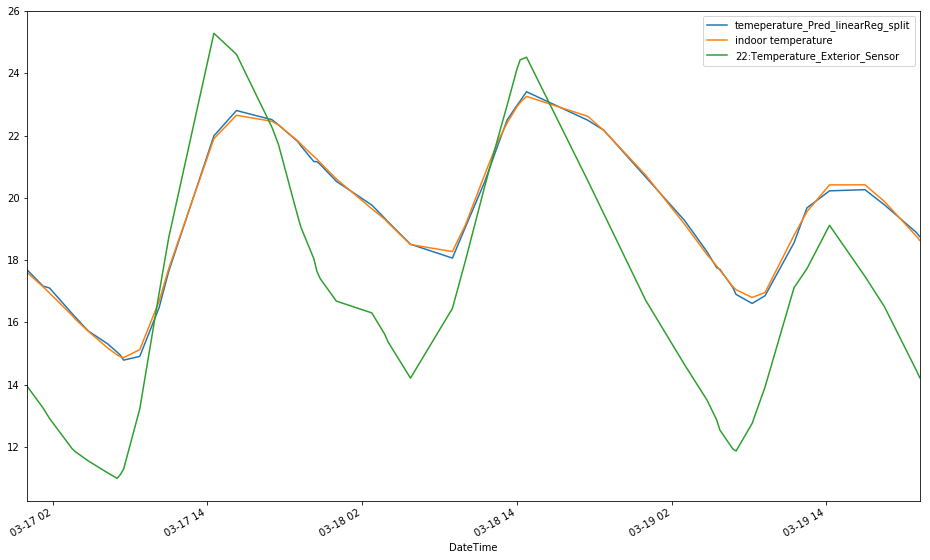

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(DF_features, DF_target, test_size=0.2)

from sklearn import linear_model
linear_reg=linear_model.LinearRegression()

linear_reg.fit(X_train, Y_train)
predict_linearReg_split=linear_reg.predict(X_test)
predict_DF_linearReg_split=pd.DataFrame(predict_linearReg_split, index=Y_test.index, columns=["temeperature_Pred_linearReg_split"])
predict_DF_linearReg_split=predict_DF_linearReg_split.join(Y_test)
predict_DF_linearReg_split=predict_DF_linearReg_split.join(DF_DataSetSourceModified["22:Temperature_Exterior_Sensor"])
predict_DF_linearReg_split.head()

predict_DF_linearReg_split_DF_ChosenDates=predict_DF_linearReg_split["2012-03-17":"2012-03-19"]
predict_DF_linearReg_split_DF_ChosenDates.plot()

plt.show()

The model with the linear regression fits very well the data, except little deviations. 

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mean_absolute_error_linearReg_split=mean_absolute_error(Y_test, predict_linearReg_split)
mean_squared_error_linearReg_split=mean_squared_error(Y_test, predict_linearReg_split)
R2_score_linearReg_split=r2_score(Y_test, predict_linearReg_split)
R2_score_linearReg_split
print("Mean absolute error: "+str(mean_absolute_error_linearReg_split))
print("Mean squared error: "+str(mean_squared_error_linearReg_split))
print("R2: " + str(R2_score_linearReg_split))

Mean absolute error: 0.112416913257
Mean squared error: 0.0368488150555
R2: 0.995635815765


The R value is very close to 1, because the influence of the shifted idoor temperature on the indoor temperature itself is very high.

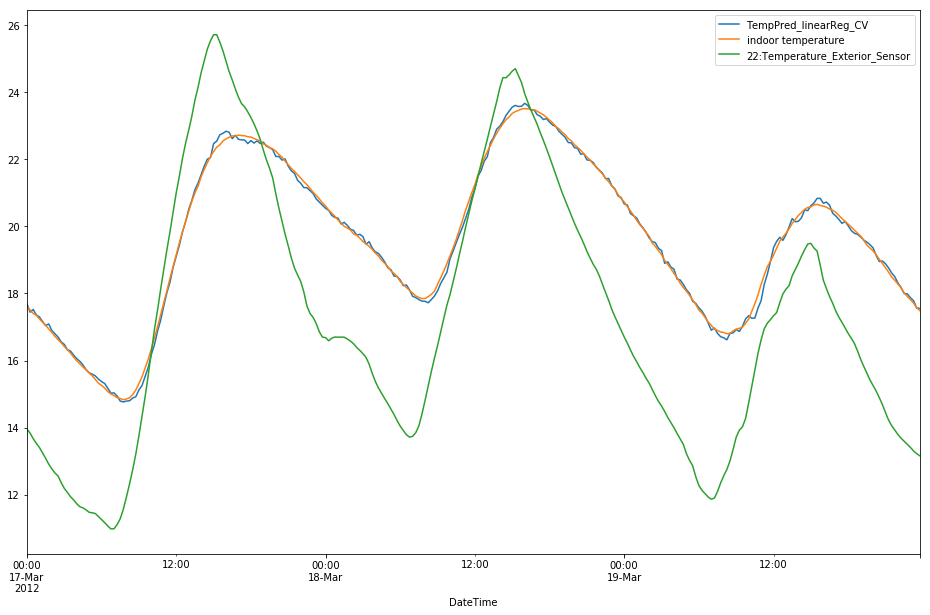

Mean absolute error: 0.11507804601
Mean squared error: 0.0340603668295
R2: 0.995723499814


In [18]:
from sklearn.model_selection import cross_val_predict
predict_linearReg_CV=cross_val_predict(linear_reg, DF_features, DF_target, cv=10)

predict_DF_linearReg_CV=pd.DataFrame(predict_linearReg_CV, index=DF_target.index, columns=["TempPred_linearReg_CV"])
predict_DF_linearReg_CV=predict_DF_linearReg_CV.join(DF_target)
predict_DF_linearReg_CV=predict_DF_linearReg_CV.join(DF_DataSetSourceModified["22:Temperature_Exterior_Sensor"])
predict_DF_linearReg_CV_DF_ChosenDates=predict_DF_linearReg_CV["2012-03-17":"2012-03-19"]
predict_DF_linearReg_CV_DF_ChosenDates.plot()
plt.show()

mean_absolute_error_linearReg_CV=mean_absolute_error(DF_target, predict_linearReg_CV)
mean_squared_error_linearReg_CV=mean_squared_error(DF_target, predict_linearReg_CV)
R2_score_linearReg_CV=r2_score(DF_target, predict_linearReg_CV)
print("Mean absolute error: "+str(mean_absolute_error_linearReg_CV))
print("Mean squared error: "+str(mean_squared_error_linearReg_CV))
print("R2: " + str(R2_score_linearReg_CV))


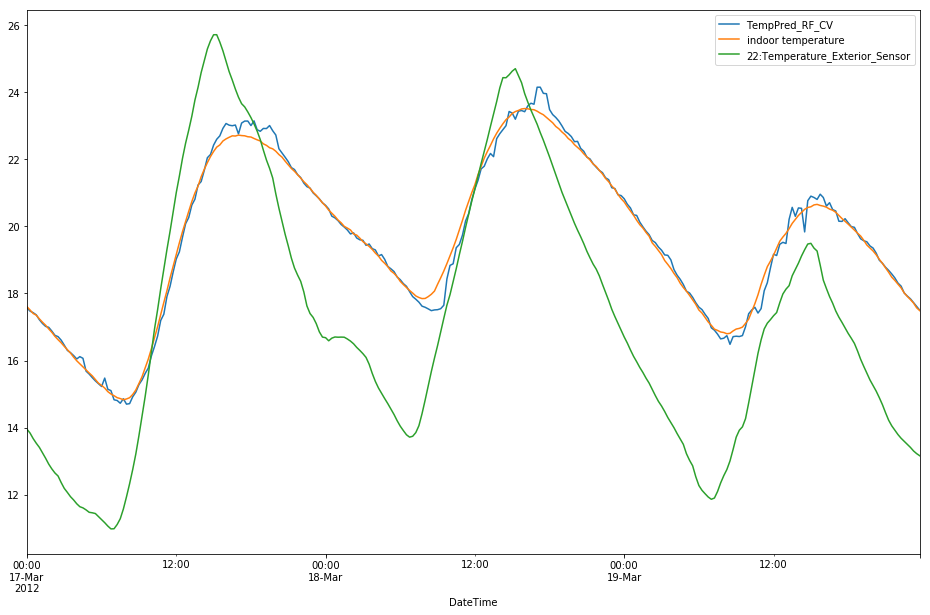

Mean absolute error: 0.236573294207
Mean squared error: 0.160496943644
R2: 0.979848566727


In [19]:
from sklearn.ensemble import RandomForestRegressor
 
reg_RF=RandomForestRegressor()
predict_RF_CV=cross_val_predict(reg_RF, DF_features, DF_target, cv=10)

predict_DF_RF_CV=pd.DataFrame(predict_RF_CV, index=DF_target.index, columns=["TempPred_RF_CV"])
predict_DF_RF_CV=predict_DF_RF_CV.join(DF_target)
predict_DF_RF_CV=predict_DF_RF_CV.join(DF_DataSetSourceModified["22:Temperature_Exterior_Sensor"])
predict_DF_RF_CV_ChosenDates=predict_DF_RF_CV["2012-03-17":"2012-03-19"]
predict_DF_RF_CV_ChosenDates.plot()
plt.show()

mean_absolute_error_RF_CV=mean_absolute_error(DF_target, predict_RF_CV)
mean_squared_error_RF_CV=mean_squared_error(DF_target, predict_RF_CV)
R2_score_RF_CV=r2_score(DF_target, predict_RF_CV)

print("Mean absolute error: "+str(mean_absolute_error_RF_CV))
print("Mean squared error: "+str(mean_squared_error_RF_CV))
print("R2: " + str(R2_score_RF_CV))

# Let's now consider the irradiance on each facade instead of the global one

In [20]:
#   FINAL DATA SET SENZA CONSIDERARE L'IRRADIANZA GLOBALE MA SOLO QUELLA SULLE FACCIATE ESTERNE
DF_FinalDataSet=pd.DataFrame([], index=DF_DataSetSourceModified.index)
DF_FinalDataSet["indoor temperature"]=DF_DataSetSourceModified["4:Temperature_Habitacion_Sensor"]
DF_FinalDataSet["outdoor temperature"]=DF_DataSetSourceModified["22:Temperature_Exterior_Sensor"]
DF_FinalDataSet["irradiance west facade"]=DF_DataSetSourceModified["15:Meteo_Exterior_Sol_Oest"]
DF_FinalDataSet["irradiance est facade"]=DF_DataSetSourceModified["16:Meteo_Exterior_Sol_Est"]
DF_FinalDataSet["irradiance sud facade"]=DF_DataSetSourceModified["17:Meteo_Exterior_Sol_Sud"]
DF_FinalDataSet.head()

DF_FinalDataSet=lag_column(DF_FinalDataSet, "outdoor temperature", lag_period=9, initial_time=4)

DF_FinalDataSet=lag_column(DF_FinalDataSet, "irradiance west facade", lag_period=22, initial_time=4)
DF_FinalDataSet=lag_column(DF_FinalDataSet, "irradiance est facade", lag_period=22, initial_time=4)
DF_FinalDataSet=lag_column(DF_FinalDataSet, "irradiance sud facade", lag_period=22, initial_time=4)
DF_FinalDataSet=lag_column(DF_FinalDataSet, "indoor temperature", lag_period=24*4, initial_time=4) # correlazione della temperatura stessa coi valori assunti nelle ore precedenti.
DF_FinalDataSet.dropna(inplace=True)
DF_FinalDataSet.head()

DF_FinalDataSet.corr()["indoor temperature"]

indoor temperature                1.000000
outdoor temperature               0.869365
irradiance west facade            0.336129
irradiance est facade            -0.269191
irradiance sud facade            -0.001218
outdoor temperature -60min        0.916903
outdoor temperature -75min        0.921936
outdoor temperature -90min        0.924173
outdoor temperature -105min       0.923645
outdoor temperature -120min       0.920406
outdoor temperature -135min       0.914497
irradiance west facade -60min     0.393330
irradiance west facade -75min     0.402971
irradiance west facade -90min     0.410848
irradiance west facade -105min    0.416957
irradiance west facade -120min    0.421424
irradiance west facade -135min    0.424242
irradiance west facade -150min    0.425482
irradiance west facade -165min    0.425280
irradiance west facade -180min    0.423617
irradiance west facade -195min    0.420530
irradiance west facade -210min    0.416154
irradiance west facade -225min    0.410496
irradiance 

In [21]:
DF_target = DF_FinalDataSet["indoor temperature"]
DF_features = DF_FinalDataSet.drop(["indoor temperature"],axis=1)
DF_features = DF_features.drop(["outdoor temperature"],axis=1)
DF_features = DF_features.drop(["irradiance west facade"],axis=1)
DF_features = DF_features.drop(["irradiance est facade"],axis=1)
DF_features = DF_features.drop(["irradiance sud facade"],axis=1)
DF_features.head()


,outdoor temperature -60min,outdoor temperature -75min,outdoor temperature -90min,outdoor temperature -105min,outdoor temperature -120min,outdoor temperature -135min,irradiance west facade -60min,irradiance west facade -75min,irradiance west facade -90min,irradiance west facade -105min,...,indoor temperature -1305min,indoor temperature -1320min,indoor temperature -1335min,indoor temperature -1350min,indoor temperature -1365min,indoor temperature -1380min,indoor temperature -1395min,indoor temperature -1410min,indoor temperature -1425min,indoor temperature -1440min
DateTime,,,,,,,,,,,,,,,,,,,,,
2012-03-14 11:45:00,17.1420,16.5860,16.0653,15.6000,15.1060,14.5200,15.599124,16.320146,17.366569,19.040876,...,20.1407,19.9693,19.7307,19.5367,19.2773,19.0414,18.7513,18.4367,18.1207,17.8275
2012-03-14 12:00:00,17.6360,17.1420,16.5860,16.0653,15.6000,15.1060,14.827883,15.599124,16.320146,17.366569,...,20.3267,20.1407,19.9693,19.7307,19.5367,19.2773,19.0414,18.7513,18.4367,18.1207
2012-03-14 12:15:00,18.0300,17.6360,17.1420,16.5860,16.0653,15.6000,14.074394,14.827883,15.599124,16.320146,...,20.4713,20.3267,20.1407,19.9693,19.7307,19.5367,19.2773,19.0414,18.7513,18.4367
2012-03-14 12:30:00,18.3747,18.0300,17.6360,17.1420,16.5860,16.0653,13.739533,14.074394,14.827883,15.599124,...,20.9093,20.4713,20.3267,20.1407,19.9693,19.7307,19.5367,19.2773,19.0414,18.7513
2012-03-14 12:45:00,18.6873,18.3747,18.0300,17.6360,17.1420,16.5860,14.273212,13.739533,14.074394,14.827883,...,21.4253,20.9093,20.4713,20.3267,20.1407,19.9693,19.7307,19.5367,19.2773,19.0414


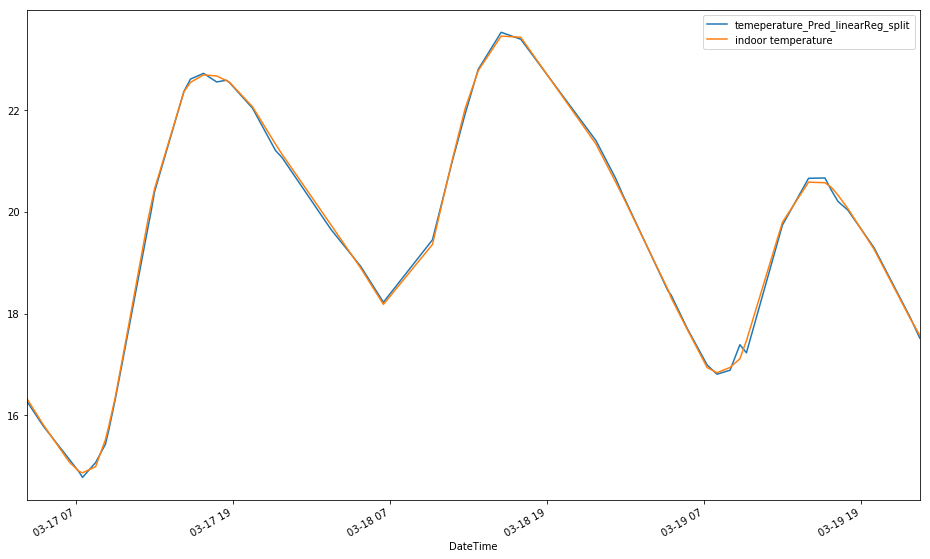

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(DF_features, DF_target, test_size=0.2)

linear_reg.fit(X_train, Y_train)
predict_linearReg_split=linear_reg.predict(X_test)
predict_DF_linearReg_split=pd.DataFrame(predict_linearReg_split, index=Y_test.index, columns=["temeperature_Pred_linearReg_split"])
predict_DF_linearReg_split=predict_DF_linearReg_split.join(Y_test)
predict_DF_linearReg_split.head()

predict_DF_linearReg_split_DF_ChosenDates=predict_DF_linearReg_split["2012-03-17":"2012-03-19"]
predict_DF_linearReg_split_DF_ChosenDates.plot()
plt.show()

mean_absolute_error_linearReg_split=mean_absolute_error(Y_test, predict_linearReg_split)
mean_squared_error_linearReg_split=mean_squared_error(Y_test, predict_linearReg_split)
R2_score_linearReg_split=r2_score(Y_test, predict_linearReg_split)



In [23]:
print("Mean absolute error: "+str(mean_absolute_error_linearReg_split))
print("Mean squared error: "+str(mean_squared_error_linearReg_split))
print("R2: " + str(R2_score_linearReg_split))

Mean absolute error: 0.0883506472835
Mean squared error: 0.0311030967778
R2: 0.995836051385


# EFFECT OF TEMPERATURE 

What would be the effect of removing the correlation of the indoor temperature with itself in the previous istant? How this will affect the model?

In [24]:
DF_FinalDataSet=pd.DataFrame([], index=DF_DataSetSourceModified.index)
DF_FinalDataSet["indoor temperature"]=DF_DataSetSourceModified["4:Temperature_Habitacion_Sensor"]
DF_FinalDataSet["outdoor temperature"]=DF_DataSetSourceModified["22:Temperature_Exterior_Sensor"]
DF_FinalDataSet["outdoor pyranometer"]=DF_DataSetSourceModified["18:Meteo_Exterior_Piranometro"]

DF_FinalDataSet=lag_column(DF_FinalDataSet, "outdoor temperature", lag_period=9, initial_time=4)
DF_FinalDataSet=lag_column(DF_FinalDataSet, "outdoor pyranometer", lag_period=22, initial_time=16)
DF_FinalDataSet.dropna(inplace=True)

DF_target = DF_FinalDataSet["indoor temperature"]
DF_features = DF_FinalDataSet.drop(["indoor temperature"],axis=1)
DF_features = DF_features.drop(["outdoor temperature"],axis=1)
DF_features = DF_features.drop(["outdoor pyranometer"],axis=1)
DF_features.head()

,outdoor temperature -60min,outdoor temperature -75min,outdoor temperature -90min,outdoor temperature -105min,outdoor temperature -120min,outdoor temperature -135min,outdoor pyranometer -240min,outdoor pyranometer -255min,outdoor pyranometer -270min,outdoor pyranometer -285min,outdoor pyranometer -300min,outdoor pyranometer -315min,outdoor pyranometer -330min
DateTime,,,,,,,,,,,,,
2012-03-13 17:15:00,21.1773,21.4667,21.7067,21.9373,22.0800,22.1373,740.949,752.683,762.743,766.037,766.251,762.069,758.880
2012-03-13 17:30:00,20.9373,21.1773,21.4667,21.7067,21.9373,22.0800,721.109,740.949,752.683,762.743,766.037,766.251,762.069
2012-03-13 17:45:00,20.7107,20.9373,21.1773,21.4667,21.7067,21.9373,699.392,721.109,740.949,752.683,762.743,766.037,766.251
2012-03-13 18:00:00,20.4627,20.7107,20.9373,21.1773,21.4667,21.7067,677.675,699.392,721.109,740.949,752.683,762.743,766.037
2012-03-13 18:15:00,20.2047,20.4627,20.7107,20.9373,21.1773,21.4667,648.427,677.675,699.392,721.109,740.949,752.683,762.743


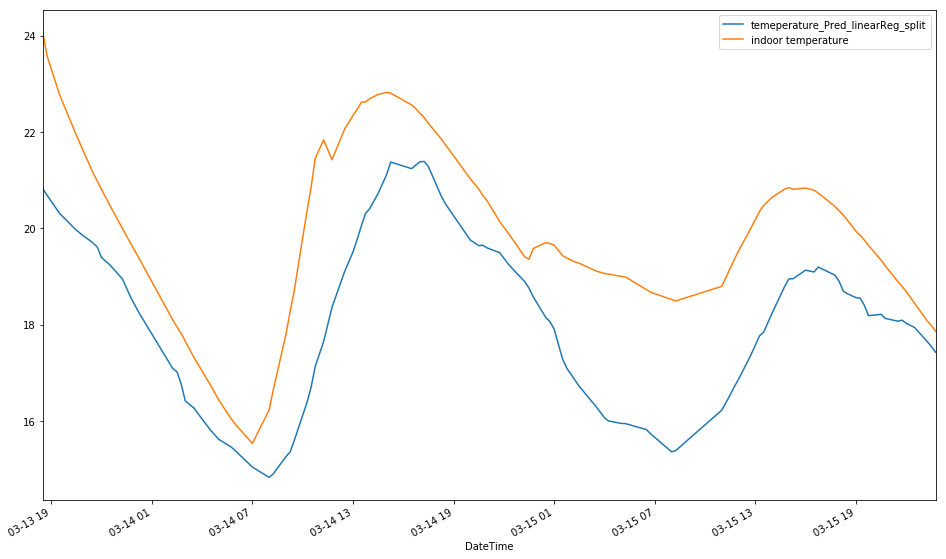

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(DF_features, DF_target, test_size=0.5)
linear_reg.fit(X_train, Y_train)
predict_linearReg_split=linear_reg.predict(X_test)
predict_DF_linearReg_split=pd.DataFrame(predict_linearReg_split, index=Y_test.index, columns=["temeperature_Pred_linearReg_split"])
predict_DF_linearReg_split=predict_DF_linearReg_split.join(Y_test)

predict_DF_linearReg_split_DF_ChosenDates=predict_DF_linearReg_split["2012-03-13":"2012-03-15"]
predict_DF_linearReg_split_DF_ChosenDates.plot()
plt.show()

In [26]:
mean_absolute_error_linearReg_split=mean_absolute_error(Y_test, predict_linearReg_split)
mean_squared_error_linearReg_split=mean_squared_error(Y_test, predict_linearReg_split)
R2_score_linearReg_split=r2_score(Y_test, predict_linearReg_split)
print("Mean absolute error: "+str(mean_absolute_error_linearReg_split))
print("Mean squared error: "+str(mean_squared_error_linearReg_split))
print("R2: " + str(R2_score_linearReg_split))

Mean absolute error: 0.713030267135
Mean squared error: 0.968253927956
R2: 0.877689136204


Unavoidably the model becomes poorer, showing the predicted temperature laying down always the real one.    

# DINNING ROOM

After have investigated in the previous part the behaviour of the room temperature, could be intersting now thinking in terms of the dinning room. The original data set infact report also the values of the dinning room temperature and those of the sun light for each facade. Since it's possible to see, from the house scheme, that the dinning room is faced at soth/est, maybe a good correlation could be found between the temperature and the amount of sun light that strikes the est and sud facades. The following analysis is made for the second dataset available. 

In [27]:
DataFolderPath="C:/Users/Lorenzo/Dropbox_Polimi_PC/Dropbox/Behzad Project" 
DataFileName="DataSet_2.txt"
DataSetFilePath=DataFolderPath+"/"+DataFileName

DF_DataSetSource=pd.read_csv(DataSetFilePath, sep=" ")
DF_DataSetSource.head()


time=DF_DataSetSource["2:Time"]
date=DF_DataSetSource["1:Date"]
New_column=date+" "+time
DF_joined=DF_DataSetSource.join([New_column])
DF_joined.head()

DF_DataSetSourceModified=DF_joined
DF_DataSetSourceModified.index=DF_joined[0]
DF_DataSetSourceModified.head()
DF_DataSetSourceModified.index.names=["DateTime"]
DF_DataSetSourceModified.head()

ParseIndex=pd.to_datetime(DF_DataSetSourceModified.index, dayfirst=True)
DF_DataSetSourceModified.index=ParseIndex

ChosenDate=DF_DataSetSourceModified["2012-04-18 00:00:00":"2012-04-20 23:45:00"]

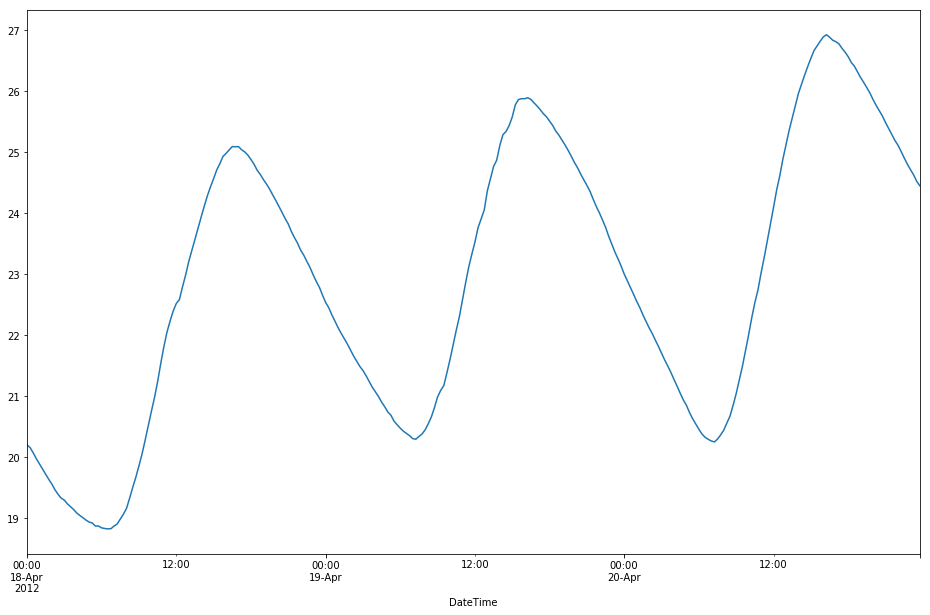

In [28]:
ChosenDate["3:Temperature_Comedor_Sensor"].plot()
plt.show()


In [29]:
booleanVector=(DF_DataSetSourceModified["16:Meteo_Exterior_Sol_Est"]<0)
DF_DataSetSourceModified["16:Meteo_Exterior_Sol_Est"][booleanVector]=0

C:\Users\Lorenzo\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


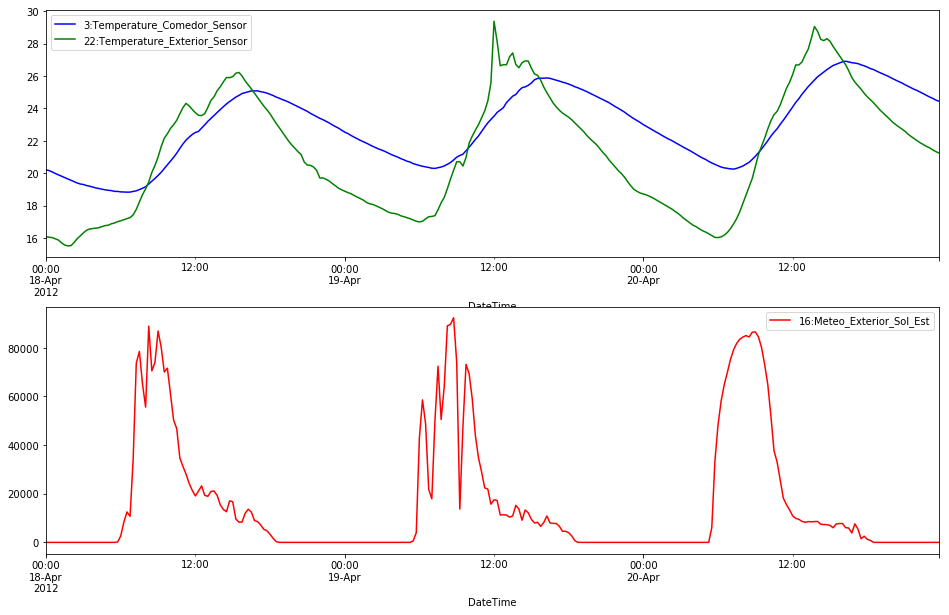

In [30]:
fig=plt.figure()
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(211)
ax3=fig.add_subplot(212)

ChosenDate["3:Temperature_Comedor_Sensor"].plot(ax=ax1, color="b", legend=True)
ChosenDate["22:Temperature_Exterior_Sensor"].plot(ax=ax2, color="g", legend=True)
ChosenDate["16:Meteo_Exterior_Sol_Est"].plot(ax=ax3, color="r", legend=True)
plt.show()

In [31]:
DF_FinalDataSet=pd.DataFrame([], index=DF_DataSetSourceModified.index)
DF_FinalDataSet["dinning room temperature"]=DF_DataSetSourceModified["3:Temperature_Comedor_Sensor"]
DF_FinalDataSet["outdoor temperature"]=DF_DataSetSourceModified["22:Temperature_Exterior_Sensor"]
DF_FinalDataSet["pyranometer est facade"]=DF_DataSetSourceModified["16:Meteo_Exterior_Sol_Est"]
DF_FinalDataSet["pyranometer sud facade"]=DF_DataSetSourceModified["17:Meteo_Exterior_Sol_Sud"]
DF_FinalDataSet.head()

,dinning room temperature,outdoor temperature,pyranometer est facade,pyranometer sud facade
DateTime,,,,
2012-04-18 00:00:00,20.2000,16.0700,0.0,0.0
2012-04-18 00:15:00,20.1593,16.0400,0.0,0.0
2012-04-18 00:30:00,20.0740,16.0160,0.0,0.0
2012-04-18 00:45:00,19.9773,15.9427,0.0,0.0
2012-04-18 01:00:00,19.8933,15.8627,0.0,0.0


In [32]:
DF_FinalDataSet=lag_column(DF_FinalDataSet, "outdoor temperature", lag_period=9, initial_time=4)
DF_FinalDataSet=lag_column(DF_FinalDataSet, "pyranometer est facade", lag_period=38, initial_time=22)
DF_FinalDataSet=lag_column(DF_FinalDataSet, "pyranometer sud facade", lag_period=28, initial_time=14)
DF_FinalDataSet=lag_column(DF_FinalDataSet, "dinning room temperature", lag_period=8, initial_time=4)
DF_FinalDataSet.dropna(inplace=True)
DF_FinalDataSet.head()

DF_FinalDataSet.corr()["dinning room temperature"]



dinning room temperature            1.000000
outdoor temperature                 0.822179
pyranometer est facade             -0.402435
pyranometer sud facade             -0.033061
outdoor temperature -60min          0.906814
outdoor temperature -75min          0.920655
outdoor temperature -90min          0.931376
outdoor temperature -105min         0.938939
outdoor temperature -120min         0.943373
outdoor temperature -135min         0.944609
pyranometer est facade -330min      0.440459
pyranometer est facade -345min      0.464179
pyranometer est facade -360min      0.484907
pyranometer est facade -375min      0.502710
pyranometer est facade -390min      0.517625
pyranometer est facade -405min      0.529503
pyranometer est facade -420min      0.538207
pyranometer est facade -435min      0.543696
pyranometer est facade -450min      0.546228
pyranometer est facade -465min      0.545890
pyranometer est facade -480min      0.542756
pyranometer est facade -495min      0.536829
pyranomete

Actually there is a correlation between the temperature and sun light, even if with a relevant dalay of some hours (in particular for the east facade, where the correlation is less pronounced). The correlations with the outside temperature and with the temperature itself are still relevant and thus mantained in the model.

In [33]:
DF_target = DF_FinalDataSet["dinning room temperature"]
DF_features = DF_FinalDataSet.drop(["dinning room temperature"],axis=1)
DF_features = DF_features.drop(["outdoor temperature"],axis=1)
DF_features = DF_features.drop(["pyranometer sud facade"],axis=1)
DF_features = DF_features.drop(["pyranometer est facade"],axis=1)
DF_features.head()

,outdoor temperature -60min,outdoor temperature -75min,outdoor temperature -90min,outdoor temperature -105min,outdoor temperature -120min,outdoor temperature -135min,pyranometer est facade -330min,pyranometer est facade -345min,pyranometer est facade -360min,pyranometer est facade -375min,...,pyranometer sud facade -360min,pyranometer sud facade -375min,pyranometer sud facade -390min,pyranometer sud facade -405min,pyranometer sud facade -420min,dinning room temperature -60min,dinning room temperature -75min,dinning room temperature -90min,dinning room temperature -105min,dinning room temperature -120min
DateTime,,,,,,,,,,,,,,,,,,,,,
2012-04-18 09:30:00,20.0453,19.4533,19.0293,18.6733,18.2160,17.7600,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19.5053,19.3280,19.1613,19.0667,18.9873
2012-04-18 09:45:00,20.4813,20.0453,19.4533,19.0293,18.6733,18.2160,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19.6720,19.5053,19.3280,19.1613,19.0667
2012-04-18 10:00:00,20.9947,20.4813,20.0453,19.4533,19.0293,18.6733,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19.8580,19.6720,19.5053,19.3280,19.1613
2012-04-18 10:15:00,21.6400,20.9947,20.4813,20.0453,19.4533,19.0293,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20.0540,19.8580,19.6720,19.5053,19.3280
2012-04-18 10:30:00,22.1600,21.6400,20.9947,20.4813,20.0453,19.4533,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20.2813,20.0540,19.8580,19.6720,19.5053


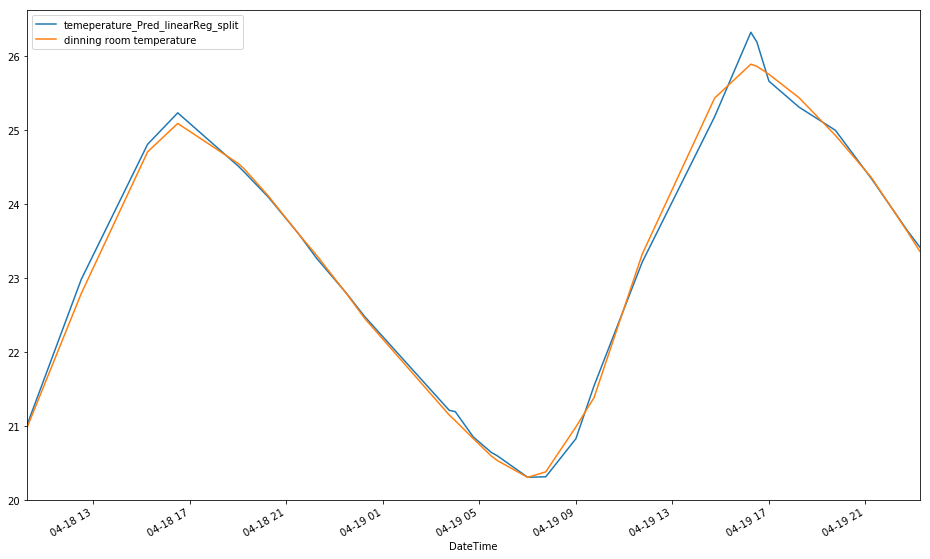

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(DF_features, DF_target, test_size=0.2)
linear_reg=linear_model.LinearRegression()

linear_reg.fit(X_train, Y_train)
predict_linearReg_split=linear_reg.predict(X_test)
predict_DF_linearReg_split=pd.DataFrame(predict_linearReg_split, index=Y_test.index, columns=["temeperature_Pred_linearReg_split"])
predict_DF_linearReg_split=predict_DF_linearReg_split.join(Y_test)
predict_DF_linearReg_split.head()

predict_DF_linearReg_split_DF_ChosenDates=predict_DF_linearReg_split["2012-04-18":"2012-04-19"]
predict_DF_linearReg_split_DF_ChosenDates.plot()
plt.show()

In [35]:
mean_absolute_error_linearReg_split=mean_absolute_error(Y_test, predict_linearReg_split)
mean_squared_error_linearReg_split=mean_squared_error(Y_test, predict_linearReg_split)
R2_score_linearReg_split=r2_score(Y_test, predict_linearReg_split)
print("Mean absolute error: "+str(mean_absolute_error_linearReg_split))
print("Mean squared error: "+str(mean_squared_error_linearReg_split))
print("R2: " + str(R2_score_linearReg_split))

Mean absolute error: 0.0675482258683
Mean squared error: 0.00921275853617
R2: 0.998583255061


As can be seen, the model fits well the data and also the dinning room temperature in this way can be predict.